## Data exploration - Deliverable #1

In [1]:
#Import packages
import cv2
#from torch.utils import data
#from torch.utils.data import Dataset, DataLoader
#import torchvision.transforms as T
import pandas as pd
import matplotlib.pyplot as plt
#import pytorch_lightning as pl
import os

In [2]:
#Count number of images with different labels
sets = ["test","train","val"]
labels = ["NORMAL","PNEUMONIA"]
current_dir = os.getcwd()

#Count number of normal labels
n_normal = 0
n_pneumonia = 0
for dataset in sets:
    path_n = os.path.join(current_dir, "data/{}/NORMAL".format(dataset))
    path_p = os.path.join(current_dir, "data/{}/PNEUMONIA".format(dataset))
    n_normal += len(os.listdir(path_n))
    n_pneumonia += len(os.listdir(path_p))

print("Number of images with 'Normal' label:",n_normal)
print("Number of images with 'Pneumonia' label:",n_pneumonia)

Number of images with 'Normal' label: 1583
Number of images with 'Pneumonia' label: 4273


(1317, 1857)


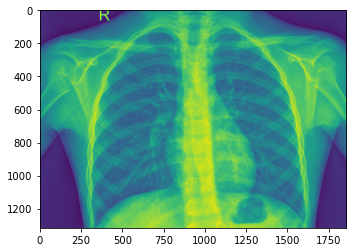

In [3]:
#Read images - test
img_test = cv2.imread("data/test/NORMAL/IM-0001-0001.jpeg", cv2.IMREAD_UNCHANGED)
print(img_test.shape)
plt.imshow(img_test)

In [4]:
#Create df with images info
imgs_df = pd.DataFrame(columns = ['filename', 'shape'])
for dataset in sets:
    for label in labels:
        rel_path = "data/{}/{}".format(dataset,label)
        img_directory = os.path.join(current_dir, rel_path)
        for img_file in os.listdir(img_directory):
            img_path = os.path.join(img_directory,img_file)
            img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
            img_shape = img.shape
            img_l = img_shape[0]
            img_w = img_shape[1]
            img_ratio = round(img_l/img_w,2)
            imgs_df = imgs_df.append({'filename':"{}/{}".format(rel_path,img_file),'shape':img.shape,
                'length':img_l,'width':img_w,'ratio':img_ratio,'label':label,
                'set':dataset},ignore_index=True)

imgs_df


/var/folders/8q/sl11mlxn42q6pvfdxn3r_0pc0000gn/T/ipykernel_91442/2498105867.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  imgs_df = imgs_df.append({'filename':"{}/{}".format(rel_path,img_file),'shape':img.shape,
/var/folders/8q/sl11mlxn42q6pvfdxn3r_0pc0000gn/T/ipykernel_91442/2498105867.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  imgs_df = imgs_df.append({'filename':"{}/{}".format(rel_path,img_file),'shape':img.shape,
/var/folders/8q/sl11mlxn42q6pvfdxn3r_0pc0000gn/T/ipykernel_91442/2498105867.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  imgs_df = imgs_df.append({'filename':"{}/{}".format(rel_path,img_file),'shape':img.shape,
/var/folders/8q/sl11mlxn42q6pvfdxn3r_0pc0000gn/T/ipykernel_91442/2498105867.

,filename,shape,label,length,ratio,set,width
0,data/test/NORMAL/IM-0031-0001.jpeg,"(1632, 1949)",NORMAL,1632.0,0.84,test,1949.0
1,data/test/NORMAL/IM-0025-0001.jpeg,"(2458, 2720)",NORMAL,2458.0,0.90,test,2720.0
2,data/test/NORMAL/NORMAL2-IM-0272-0001.jpeg,"(917, 1340)",NORMAL,917.0,0.68,test,1340.0
3,data/test/NORMAL/NORMAL2-IM-0102-0001.jpeg,"(2152, 2366)",NORMAL,2152.0,0.91,test,2366.0
4,data/test/NORMAL/NORMAL2-IM-0229-0001.jpeg,"(1168, 1488)",NORMAL,1168.0,0.78,test,1488.0
...,...,...,...,...,...,...,...
5851,data/val/PNEUMONIA/person1946_bacteria_4874.jpeg,"(592, 968)",PNEUMONIA,592.0,0.61,val,968.0
5852,data/val/PNEUMONIA/person1947_bacteria_4876.jpeg,"(664, 1152)",PNEUMONIA,664.0,0.58,val,1152.0
5853,data/val/PNEUMONIA/person1946_bacteria_4875.jpeg,"(712, 1072)",PNEUMONIA,712.0,0.66,val,1072.0
5854,data/val/PNEUMONIA/person1949_bacteria_4880.jpeg,"(944, 1416)",PNEUMONIA,944.0,0.67,val,1416.0


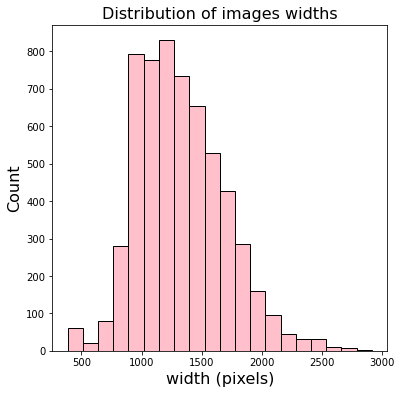

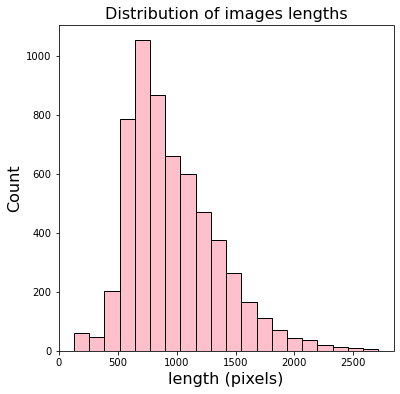

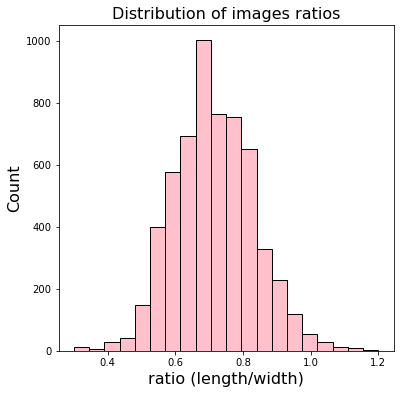

In [5]:
def plot_shape_distrib(shape_col,n_bins=20):
    """ 
    Plot a histogram to visualize distribution of images shapes attributes
    Input:
    - shape_col(str): Column to visualize in histogram
    -n_bins(int): Number of bins for the 
    Return:
        None, visualizes plt histogram on Jupyter Notebook
    """
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    if shape_col != "ratio":
        ax.set_xlabel("{} (pixels)".format(shape_col), fontsize=16)
    else: 
        ax.set_xlabel("ratio (length/width)", fontsize=16)
    ax.set_ylabel("Count", fontsize=16)
    ax.set_title("Distribution of images {}s".format(shape_col), fontsize=16)
    ax.hist(imgs_df.loc[:,shape_col], color='pink',edgecolor='black',bins=n_bins)

plot_shape_distrib("width")
plot_shape_distrib("length")
plot_shape_distrib("ratio")


In [11]:
#Save csv for each dataset
imgs_df_test = imgs_df.loc[imgs_df.loc[:,"set"]=="test",:] 
imgs_df_train = imgs_df.loc[imgs_df.loc[:,"set"]=="train",:] 
imgs_df_val = imgs_df.loc[imgs_df.loc[:,"set"]=="val",:] 

imgs_df_test.to_csv(os.path.join(current_dir, "data/csv_files/test.csv"), index = False)
imgs_df_train.to_csv(os.path.join(current_dir, "data/csv_files/train.csv"), index = False)
imgs_df_train.to_csv(os.path.join(current_dir, "data/csv_files/val.csv"), index = False)


,filename,shape,label,length,ratio,set,width
0,data/test/NORMAL/IM-0031-0001.jpeg,"(1632, 1949)",NORMAL,1632.0,0.84,test,1949.0
1,data/test/NORMAL/IM-0025-0001.jpeg,"(2458, 2720)",NORMAL,2458.0,0.90,test,2720.0
2,data/test/NORMAL/NORMAL2-IM-0272-0001.jpeg,"(917, 1340)",NORMAL,917.0,0.68,test,1340.0
3,data/test/NORMAL/NORMAL2-IM-0102-0001.jpeg,"(2152, 2366)",NORMAL,2152.0,0.91,test,2366.0
4,data/test/NORMAL/NORMAL2-IM-0229-0001.jpeg,"(1168, 1488)",NORMAL,1168.0,0.78,test,1488.0
...,...,...,...,...,...,...,...
619,data/test/PNEUMONIA/person120_bacteria_572.jpeg,"(688, 1024)",PNEUMONIA,688.0,0.67,test,1024.0
620,data/test/PNEUMONIA/person171_bacteria_826.jpeg,"(672, 1088)",PNEUMONIA,672.0,0.62,test,1088.0
621,data/test/PNEUMONIA/person109_bacteria_512.jpeg,"(808, 1256)",PNEUMONIA,808.0,0.64,test,1256.0
622,data/test/PNEUMONIA/person83_bacteria_410.jpeg,"(648, 912)",PNEUMONIA,648.0,0.71,test,912.0


In [20]:
#Count number of labels
len(imgs_df.loc[imgs_df.loc[:,"label"]=="NORMAL",:])
len(imgs_df.loc[imgs_df.loc[:,"label"]=="PNEUMONIA",:])

for dataset in sets:
    for label in labels:
        n_obs = len(imgs_df.loc[(imgs_df.loc[:,"label"]=="{}".format(label)) & (imgs_df.loc[:,"set"]=="{}".format(dataset)),:])
        print("Number of observations in",dataset, "with label", label," = ",n_obs)


Number of observations in test with label NORMAL  =  234
Number of observations in test with label PNEUMONIA  =  390
Number of observations in train with label NORMAL  =  1341
Number of observations in train with label PNEUMONIA  =  3875
Number of observations in val with label NORMAL  =  8
Number of observations in val with label PNEUMONIA  =  8
